In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('lung cancer.csv')

In [3]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [4]:
df.shape

(309, 16)

In [5]:
df.duplicated().sum()

33

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS OF BREATH    276 non-null    int64 
 13  SWALLOWING DIFFICULTY  276 non-null    int64 
 14  CHEST PAIN             276 non-null    int64 
 15  LUNG_CANCER            

In [8]:
df.nunique()

GENDER                    2
AGE                      39
SMOKING                   2
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             2
CHRONIC DISEASE           2
FATIGUE                   2
ALLERGY                   2
WHEEZING                  2
ALCOHOL CONSUMING         2
COUGHING                  2
SHORTNESS OF BREATH       2
SWALLOWING DIFFICULTY     2
CHEST PAIN                2
LUNG_CANCER               2
dtype: int64

In [9]:
df.isnull()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
280,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
281,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
282,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971
std,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [11]:
df.corr()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
AGE,1.000000,-0.073410,0.025773,0.050605,0.037848,-0.003431,0.021606,0.037139,0.052803,0.052049,0.168654,-0.009189,0.003199,-0.035806
SMOKING,-0.073410,1.000000,-0.020799,0.153389,-0.030364,-0.149415,-0.037803,-0.030179,-0.147081,-0.052771,-0.138553,0.051761,0.042152,0.106984
YELLOW_FINGERS,0.025773,-0.020799,1.000000,0.558344,0.313067,0.015316,-0.099644,-0.147130,-0.058756,-0.273643,0.020803,-0.109959,0.333349,-0.099169
ANXIETY,0.050605,0.153389,0.558344,1.000000,0.210278,-0.006938,-0.181474,-0.159451,-0.174009,-0.152228,-0.218843,-0.155678,0.478820,-0.123182
PEER_PRESSURE,0.037848,-0.030364,0.313067,0.210278,1.000000,0.042893,0.094661,-0.066887,-0.037769,-0.132603,-0.068224,-0.214115,0.327764,-0.074655
CHRONIC DISEASE,-0.003431,-0.149415,0.015316,-0.006938,0.042893,1.000000,-0.099411,0.134309,-0.040546,0.010144,-0.160813,-0.011760,0.068263,-0.048895
FATIGUE,0.021606,-0.037803,-0.099644,-0.181474,0.094661,-0.099411,1.000000,-0.001841,0.152151,-0.181573,0.148538,0.407027,-0.115727,0.013757
ALLERGY,0.037139,-0.030179,-0.147130,-0.159451,-0.066887,0.134309,-0.001841,1.000000,0.166517,0.378125,0.206367,-0.018030,-0.037581,0.245440
WHEEZING,0.052803,-0.147081,-0.058756,-0.174009,-0.037769,-0.040546,0.152151,0.166517,1.000000,0.261061,0.353657,0.042289,0.108304,0.142846
ALCOHOL CONSUMING,0.052049,-0.052771,-0.273643,-0.152228,-0.132603,0.010144,-0.181573,0.378125,0.261061,1.000000,0.198023,-0.163370,-0.000635,0.310767


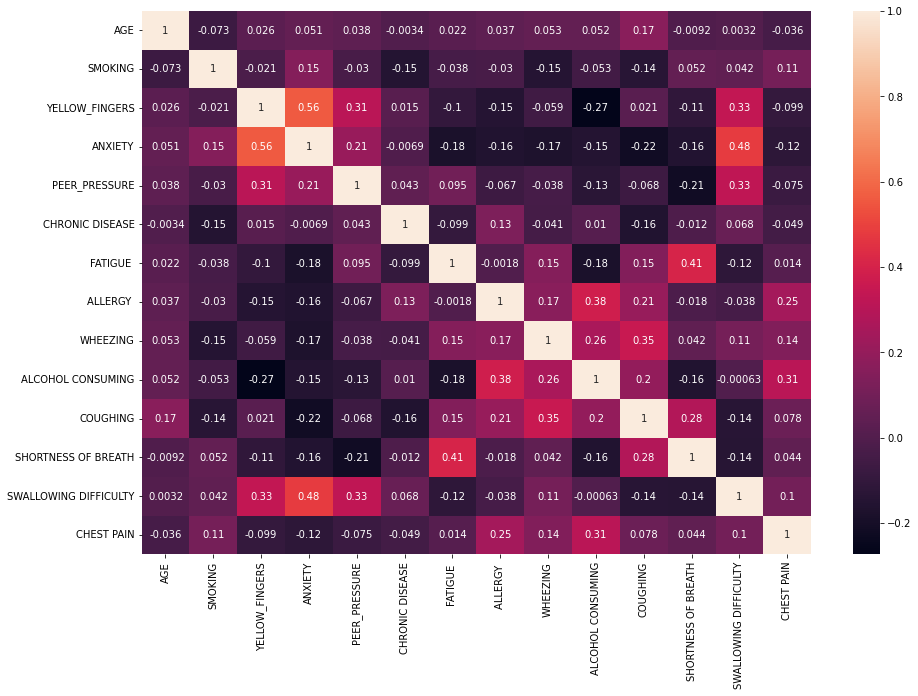

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [13]:
label_encoder=LabelEncoder()

In [14]:
df['GENDER']=label_encoder.fit_transform(df['GENDER'])
df['LUNG_CANCER']=label_encoder.fit_transform(df['LUNG_CANCER'])
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,59,1,2,2,2,1,1,2,2,1,2,1,2,1,1
280,0,59,2,1,1,1,2,2,2,1,1,1,2,1,1,0
281,1,55,2,1,1,1,1,2,2,1,1,1,2,1,2,0
282,1,46,1,2,2,1,1,1,1,1,1,1,1,2,2,0


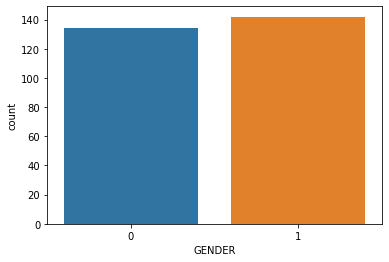

In [15]:
sns.countplot(x='GENDER',data=df);

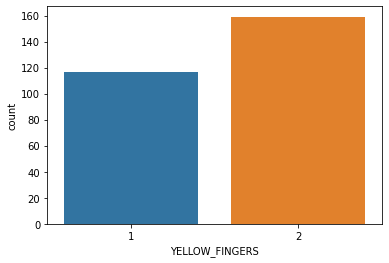

In [16]:
sns.countplot(x='YELLOW_FINGERS',data=df);

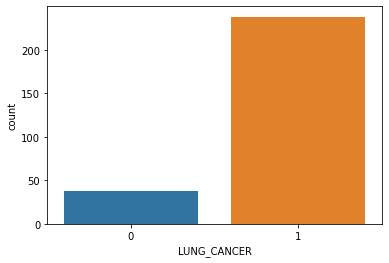

In [17]:
sns.countplot(x='LUNG_CANCER',data=df);

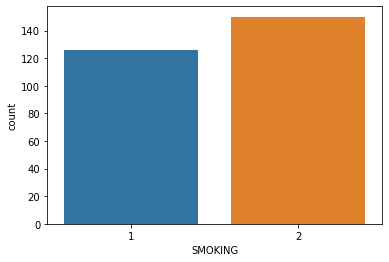

In [18]:
sns.countplot(x='SMOKING',data=df);

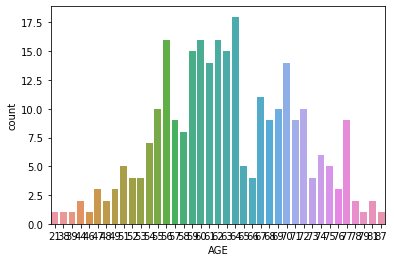

In [19]:
sns.countplot(x='AGE',data=df);

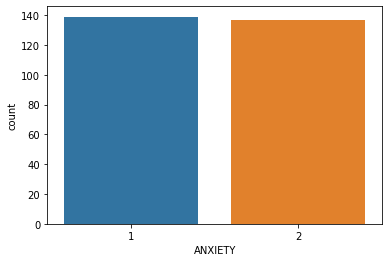

In [20]:
sns.countplot(x='ANXIETY',data=df);

In [21]:
df1 = df[['GENDER', 'AGE', 'SMOKING', 'ALCOHOL CONSUMING', 'SHORTNESS OF BREATH', 'CHEST PAIN', 'LUNG_CANCER']]
df1

,GENDER,AGE,SMOKING,ALCOHOL CONSUMING,SHORTNESS OF BREATH,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,2,1
1,1,74,2,1,2,2,1
2,0,59,1,1,2,2,0
3,1,63,2,2,1,2,0
4,0,63,1,1,2,1,0
...,...,...,...,...,...,...,...
279,0,59,1,1,1,1,1
280,0,59,2,1,2,1,0
281,1,55,2,1,2,2,0
282,1,46,1,1,1,2,0


In [22]:
x=df1.iloc[:,:-1]
x

,GENDER,AGE,SMOKING,ALCOHOL CONSUMING,SHORTNESS OF BREATH,CHEST PAIN
0,1,69,1,2,2,2
1,1,74,2,1,2,2
2,0,59,1,1,2,2
3,1,63,2,2,1,2
4,0,63,1,1,2,1
...,...,...,...,...,...,...
279,0,59,1,1,1,1
280,0,59,2,1,2,1
281,1,55,2,1,2,2
282,1,46,1,1,1,2


In [23]:
y=df['LUNG_CANCER']
y

0      1
1      1
2      0
3      0
4      0
      ..
279    1
280    0
281    0
282    0
283    1
Name: LUNG_CANCER, Length: 276, dtype: int32

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
                                              

In [25]:
lr=LogisticRegression()

In [26]:
lr.fit(x_train,y_train)

LogisticRegression()

In [27]:
y_pred=lr.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [28]:
print(y_test)

157    0
7      1
101    1
13     1
114    1
89     1
93     1
66     1
277    0
150    1
172    1
217    1
29     0
77     1
130    1
3      0
203    1
35     1
190    1
143    1
136    1
142    1
250    1
103    1
121    1
11     1
115    1
228    1
131    1
155    1
65     1
30     0
53     1
164    1
175    1
235    1
74     1
84     1
10     1
167    1
174    1
158    1
98     1
134    1
240    1
23     1
123    1
251    1
210    1
85     1
118    1
272    0
137    1
243    1
162    1
54     1
Name: LUNG_CANCER, dtype: int32


In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [30]:
confusion_matrix(y_test,y_pred)

array([[ 0,  6],
       [ 1, 49]], dtype=int64)

In [31]:
accuracy_score(y_test,y_pred)

0.875

In [32]:
import pickle

In [33]:
file='lr1.pkl'

In [34]:
pickle.dump(lr,open('lr1.pkl','wb'))

In [35]:
pic=pickle.load(open('lr1.pkl','rb'))
pic

LogisticRegression()

In [36]:
pic.predict_proba(x_test)

array([[0.16889428, 0.83110572],
       [0.30239276, 0.69760724],
       [0.0755198 , 0.9244802 ],
       [0.03035269, 0.96964731],
       [0.04080371, 0.95919629],
       [0.02974759, 0.97025241],
       [0.06426812, 0.93573188],
       [0.17029011, 0.82970989],
       [0.14867191, 0.85132809],
       [0.02197344, 0.97802656],
       [0.17544266, 0.82455734],
       [0.02870221, 0.97129779],
       [0.12399646, 0.87600354],
       [0.03259854, 0.96740146],
       [0.30239276, 0.69760724],
       [0.03902046, 0.96097954],
       [0.05218478, 0.94781522],
       [0.24402566, 0.75597434],
       [0.34585436, 0.65414564],
       [0.09457419, 0.90542581],
       [0.11909097, 0.88090903],
       [0.31516287, 0.68483713],
       [0.28424656, 0.71575344],
       [0.040426  , 0.959574  ],
       [0.03669758, 0.96330242],
       [0.02758633, 0.97241367],
       [0.23284833, 0.76715167],
       [0.17029011, 0.82970989],
       [0.41520044, 0.58479956],
       [0.15695672, 0.84304328],
       [0.